# Day 08. Exercise 05
# Clustering

## 0. Imports

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from sklearn.metrics import silhouette_score

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [22]:
df = pd.read_csv('../data/regression.csv').drop('pageviews',axis = 1)
df

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


In [23]:
X = df[['num_commits','AVG(diff)']]
X


,num_commits,AVG(diff)
0,62,-64.400000
1,20,-74.800000
2,61,-159.000000
3,51,-61.600000
4,5,-5.666667
5,118,-98.750000
6,65,-95.500000
7,79,-92.600000
8,60,-86.400000
9,18,-105.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

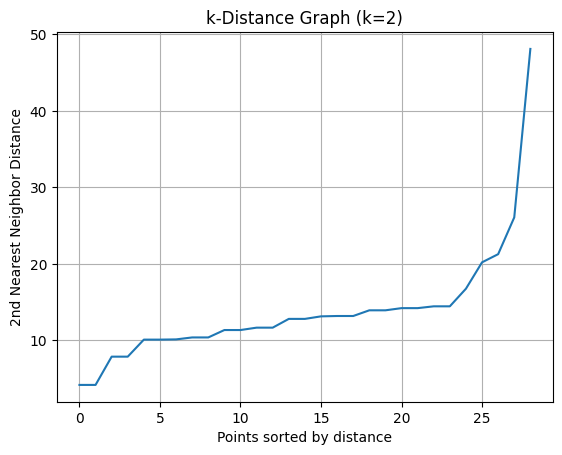

In [24]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, 1])
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('2nd Nearest Neighbor Distance')
plt.title('k-Distance Graph (k=2)')
plt.grid(True)
plt.show()


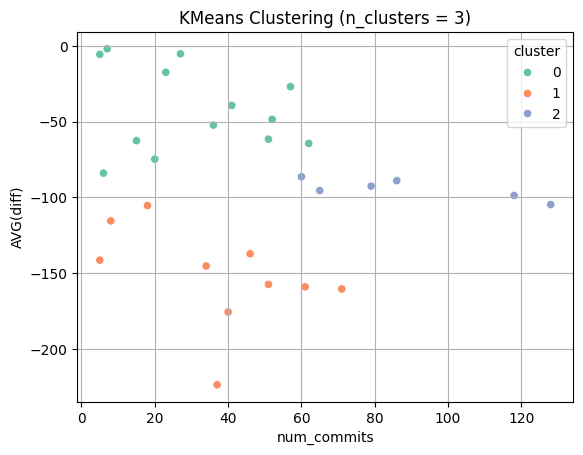

In [25]:
kmeans = KMeans(n_clusters=3, random_state=21).fit(X)
X['cluster'] = kmeans.labels_ 
sns.scatterplot(data=X, x='num_commits', y='AVG(diff)', hue='cluster', palette='Set2')
plt.title("KMeans Clustering (n_clusters = 3)")
plt.grid(True)

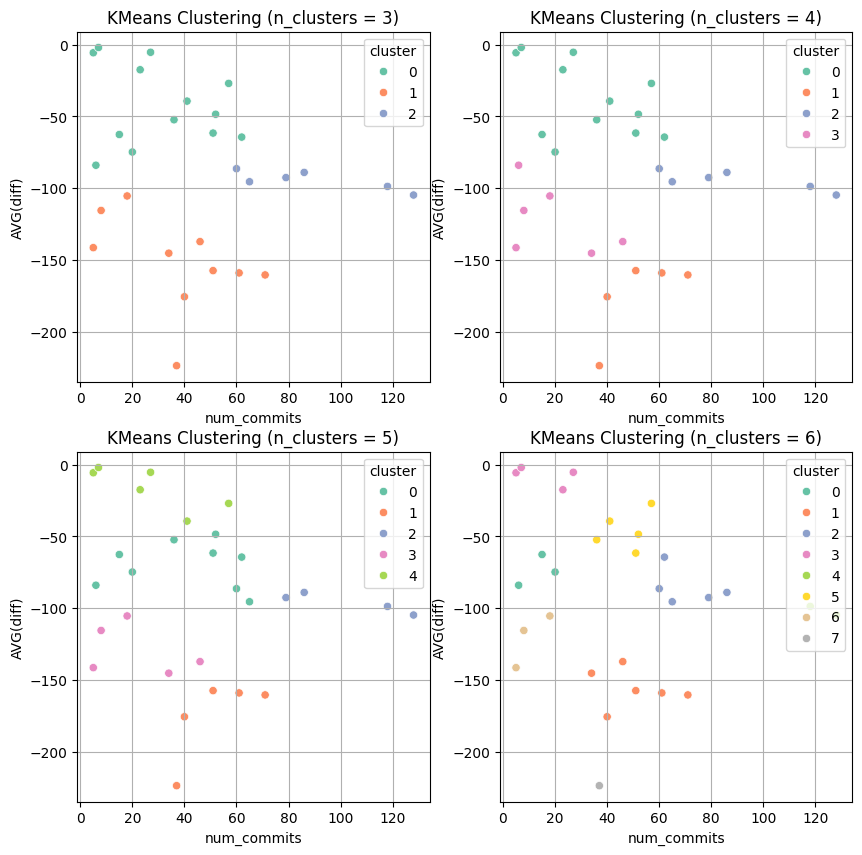

In [26]:


plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
kmeans = KMeans(n_clusters=3, random_state=21).fit(X)
X['cluster'] = kmeans.labels_ 
sns.scatterplot(data=X, x='num_commits', y='AVG(diff)', hue='cluster', palette='Set2')
plt.title("KMeans Clustering (n_clusters = 3)")
plt.grid(True)



plt.subplot(2, 2, 2)
kmeans = KMeans(n_clusters=4, random_state=21).fit(X)
X['cluster'] = kmeans.labels_ 
sns.scatterplot(data=X, x='num_commits', y='AVG(diff)', hue='cluster', palette='Set2')
plt.title("KMeans Clustering (n_clusters = 4)")
plt.grid(True)


plt.subplot(2, 2, 3)
kmeans = KMeans(n_clusters=5, random_state=21).fit(X)
X['cluster'] = kmeans.labels_ 
sns.scatterplot(data=X, x='num_commits', y='AVG(diff)', hue='cluster', palette='Set2')
plt.title("KMeans Clustering (n_clusters = 5)")
plt.grid(True)



plt.subplot(2, 2, 4)
kmeans = KMeans(n_clusters=8, random_state=21).fit(X)
X['cluster'] = kmeans.labels_ 
sns.scatterplot(data=X, x='num_commits', y='AVG(diff)', hue='cluster', palette='Set2')
plt.title("KMeans Clustering (n_clusters = 6)")
plt.grid(True)
plt.show()

In [27]:
labels = kmeans.labels_
score = silhouette_score(X,labels)
print(f"Silhouette score: {score:.3f}")

Silhouette score: 0.489


In [28]:
for i in range(3,10):
    score = silhouette_score(X,KMeans(n_clusters=i, random_state=21).fit(X).labels_)
    print(f"n_clusters {i}, Silhouette score: {score:.3f}")

n_clusters 3, Silhouette score: 0.445
n_clusters 4, Silhouette score: 0.414
n_clusters 5, Silhouette score: 0.351
n_clusters 6, Silhouette score: 0.395
n_clusters 7, Silhouette score: 0.396
n_clusters 8, Silhouette score: 0.489
n_clusters 9, Silhouette score: 0.456


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

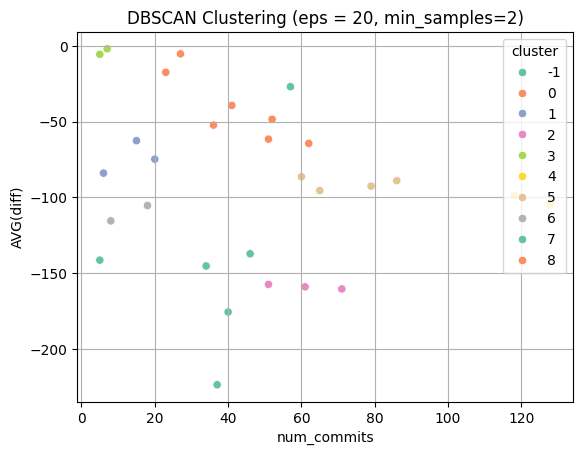

In [29]:
clustering = DBSCAN(eps=20,min_samples=2).fit(X)
X['cluster'] = clustering.labels_
sns.scatterplot(data = X, x = 'num_commits',y = 'AVG(diff)',hue='cluster',palette = 'Set2')
plt.title("DBSCAN Clustering (eps = 20, min_samples=2)")
plt.grid(True)

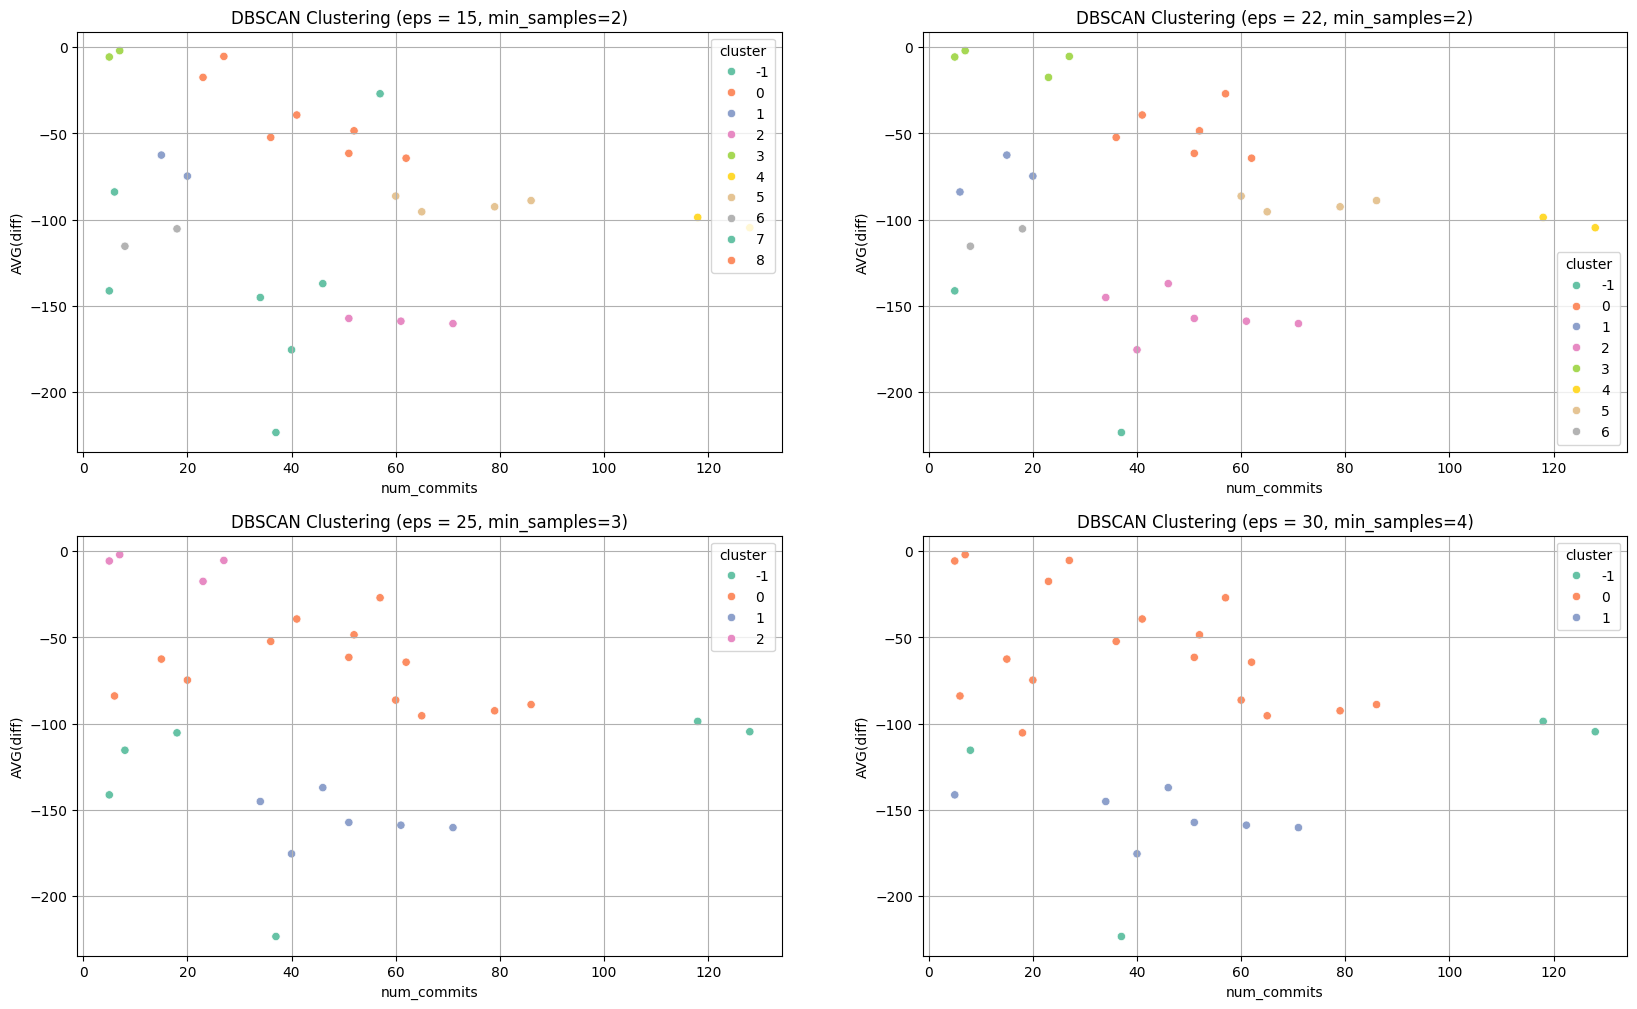

In [30]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
clustering = DBSCAN(eps=15,min_samples=2).fit(X)
X['cluster'] = clustering.labels_
sns.scatterplot(data = X, x = 'num_commits',y = 'AVG(diff)',hue='cluster',palette = 'Set2')
plt.title("DBSCAN Clustering (eps = 15, min_samples=2)")
plt.grid(True)

plt.subplot(2,2,2)
clustering = DBSCAN(eps=22,min_samples=2).fit(X)
X['cluster'] = clustering.labels_
sns.scatterplot(data = X, x = 'num_commits',y = 'AVG(diff)',hue='cluster',palette = 'Set2')
plt.title("DBSCAN Clustering (eps = 22, min_samples=2)")
plt.grid(True)

plt.subplot(2,2,3)
clustering = DBSCAN(eps=25,min_samples=3).fit(X)
X['cluster'] = clustering.labels_
sns.scatterplot(data = X, x = 'num_commits',y = 'AVG(diff)',hue='cluster',palette = 'Set2')
plt.title("DBSCAN Clustering (eps = 25, min_samples=3)")
plt.grid(True)

plt.subplot(2,2,4)
clustering = DBSCAN(eps=30,min_samples=4).fit(X)
X['cluster'] = clustering.labels_
sns.scatterplot(data = X, x = 'num_commits',y = 'AVG(diff)',hue='cluster',palette = 'Set2')
plt.title("DBSCAN Clustering (eps = 30, min_samples=4)")
plt.grid(True)

In [31]:
values = {15:2,22:2,25:3,30:4}
for eps,min_samples in values.items():
    score = silhouette_score(X,DBSCAN(eps=eps,min_samples=min_samples).fit(X).labels_)
    print(f"DBSCAN - eps: {eps}, min_samples: {min_samples} Silhouette score: {score:.3f}")

DBSCAN - eps: 15, min_samples: 2 Silhouette score: 0.347
DBSCAN - eps: 22, min_samples: 2 Silhouette score: 0.479
DBSCAN - eps: 25, min_samples: 3 Silhouette score: 0.323
DBSCAN - eps: 30, min_samples: 4 Silhouette score: 0.379


## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

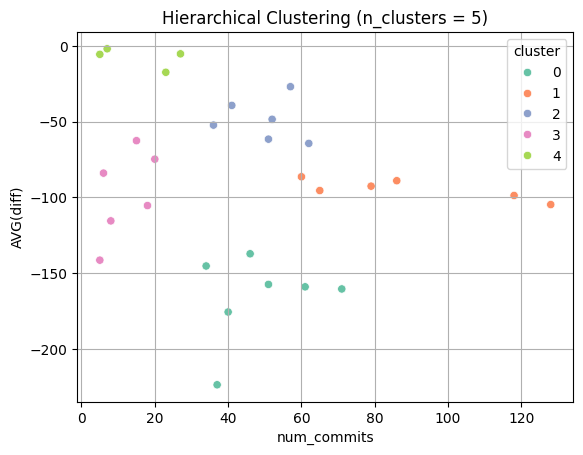

In [32]:
clustering = AgglomerativeClustering(n_clusters = 5).fit(X)
X['cluster'] = clustering.labels_
sns.scatterplot(data = X, x = 'num_commits',y = 'AVG(diff)',hue='cluster',palette = 'Set2')
plt.title("Hierarchical Clustering (n_clusters = 5)")
plt.grid(True)

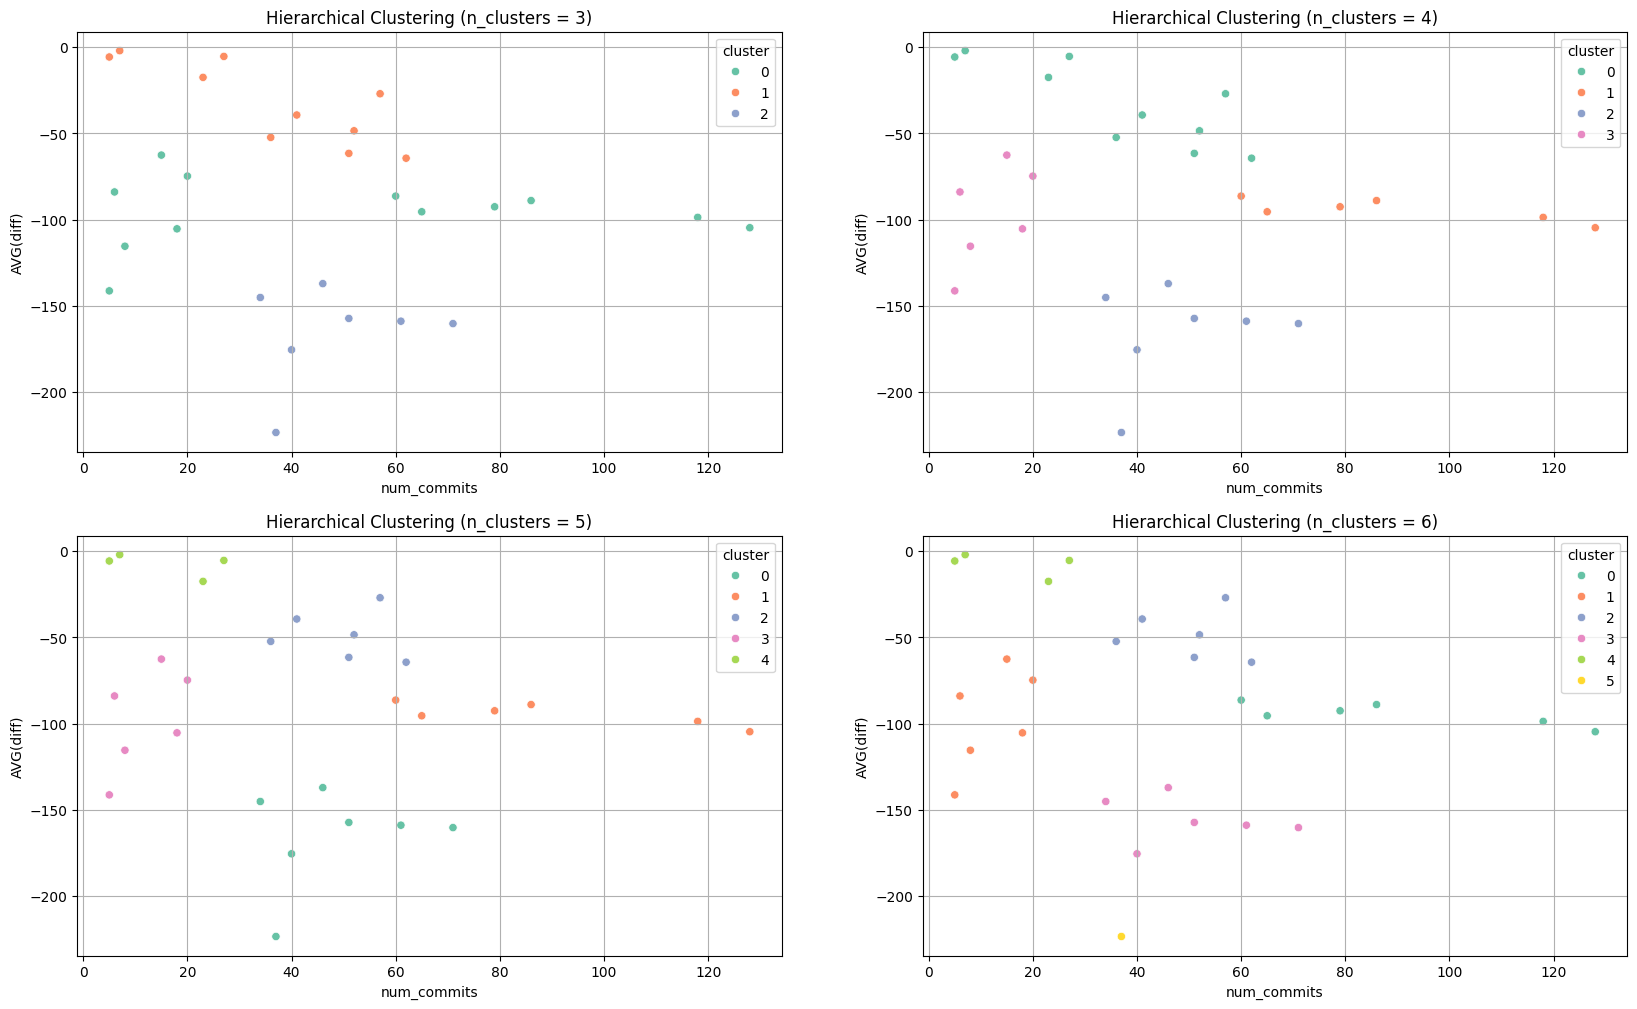

In [33]:

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
clustering = AgglomerativeClustering(n_clusters = 3).fit(X)
X['cluster'] = clustering.labels_
sns.scatterplot(data = X, x = 'num_commits',y = 'AVG(diff)',hue='cluster',palette = 'Set2')
plt.title("Hierarchical Clustering (n_clusters = 3)")
plt.grid(True)

plt.subplot(2,2,2)
clustering = AgglomerativeClustering(n_clusters = 4).fit(X)
X['cluster'] = clustering.labels_
sns.scatterplot(data = X, x = 'num_commits',y = 'AVG(diff)',hue='cluster',palette = 'Set2')
plt.title("Hierarchical Clustering (n_clusters = 4)")
plt.grid(True)

plt.subplot(2,2,3)
clustering = AgglomerativeClustering(n_clusters = 5).fit(X)
X['cluster'] = clustering.labels_
sns.scatterplot(data = X, x = 'num_commits',y = 'AVG(diff)',hue='cluster',palette = 'Set2')
plt.title("Hierarchical Clustering (n_clusters = 5)")
plt.grid(True)

plt.subplot(2,2,4)
clustering = AgglomerativeClustering(n_clusters = 6).fit(X)
X['cluster'] = clustering.labels_
sns.scatterplot(data = X, x = 'num_commits',y = 'AVG(diff)',hue='cluster',palette = 'Set2')
plt.title("Hierarchical Clustering (n_clusters = 6)")
plt.grid(True)

In [34]:
for i in range(3,10):
    score = silhouette_score(X,AgglomerativeClustering(n_clusters = i).fit(X).labels_)
    print(f"n_clusters {i}, Silhouette score: {score:.3f}")

n_clusters 3, Silhouette score: 0.339
n_clusters 4, Silhouette score: 0.445
n_clusters 5, Silhouette score: 0.464
n_clusters 6, Silhouette score: 0.453
n_clusters 7, Silhouette score: 0.487
n_clusters 8, Silhouette score: 0.508
n_clusters 9, Silhouette score: 0.476


In [35]:
X

,num_commits,AVG(diff),cluster
0,62,-64.400000,2
1,20,-74.800000,1
2,61,-159.000000,3
3,51,-61.600000,2
4,5,-5.666667,4
5,118,-98.750000,0
6,65,-95.500000,0
7,79,-92.600000,0
8,60,-86.400000,0
9,18,-105.400000,1


In [36]:


Z = linkage(df[['num_commits','AVG(diff)']],method='ward')
Z

array([[  4.        ,  11.        ,   4.1766547 ,   2.        ],
       [  7.        ,  12.        ,   7.87146746,   2.        ],
       [  2.        ,  28.        ,  10.09752445,   2.        ],
       [  6.        ,   8.        ,  10.38315944,   2.        ],
       [  0.        ,   3.        ,  11.3507709 ,   2.        ],
       [  5.        ,  24.        ,  11.66190379,   2.        ],
       [ 14.        ,  22.        ,  12.80733297,   2.        ],
       [  1.        ,  26.        ,  13.18483978,   2.        ],
       [ 15.        ,  21.        ,  13.92838828,   2.        ],
       [  9.        ,  27.        ,  14.2130222 ,   2.        ],
       [ 10.        ,  16.        ,  14.45      ,   2.        ],
       [ 13.        ,  37.        ,  15.88966587,   3.        ],
       [ 23.        ,  31.        ,  17.52293735,   3.        ],
       [ 19.        ,  36.        ,  22.10098037,   3.        ],
       [ 30.        ,  32.        ,  28.28506673,   4.        ],
       [ 29.        ,  35

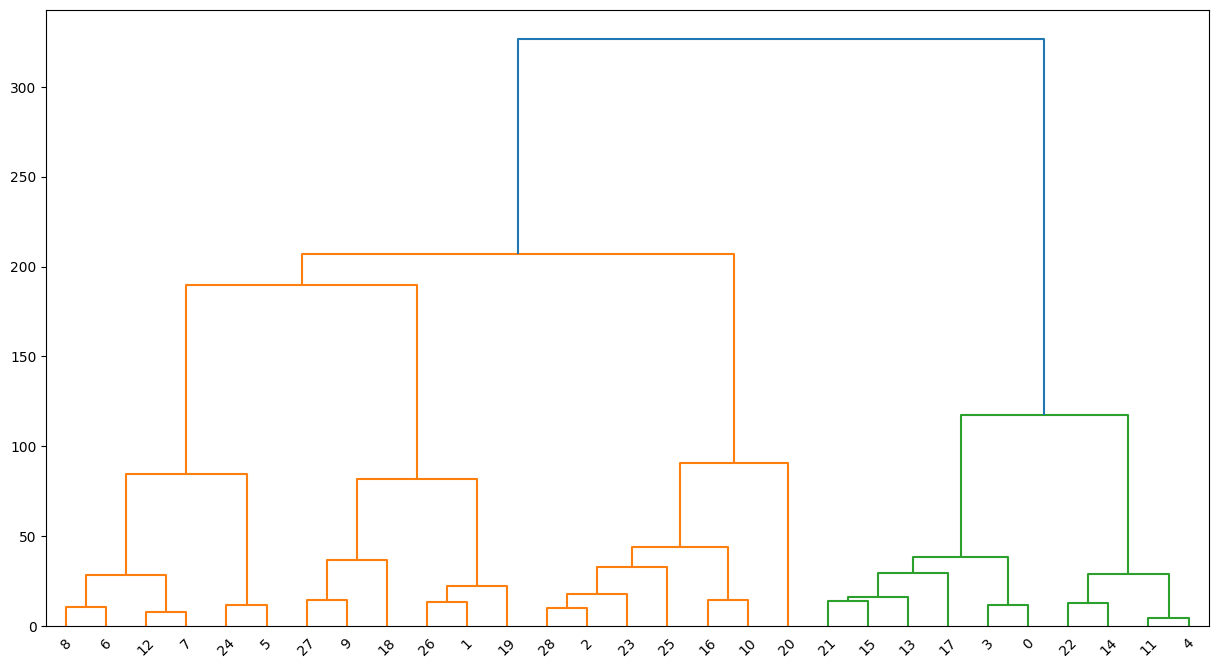

In [37]:
plt.figure(figsize=(15,8))
dendrogram(Z,
           orientation='top',
           distance_sort='descending',)

plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [38]:
values = {15:2,20:2,25:3,30:4}
for eps,min_samples in values.items():
    score = silhouette_score(X,DBSCAN(eps=eps,min_samples=min_samples).fit(X).labels_)
    print(f"DBSCAN - eps: {eps}, min_samples: {min_samples} Silhouette score: {score:.3f}")

DBSCAN - eps: 15, min_samples: 2 Silhouette score: 0.347
DBSCAN - eps: 20, min_samples: 2 Silhouette score: 0.384
DBSCAN - eps: 25, min_samples: 3 Silhouette score: 0.324
DBSCAN - eps: 30, min_samples: 4 Silhouette score: 0.379


In [39]:
def optimize_clustering(model_class, model_params, param_name, param_range, data):
    silhouette_scores = []
    best_score = -1
    for param_value in param_range:
        model_params[param_name] = param_value
        model = model_class(**model_params)
        cluster_labels = model.fit_predict(data)
        score = silhouette_score(data,cluster_labels)
        silhouette_scores.append(score)
        
        if score > best_score:
            best_score = score
            best_param_value = param_value
            best_cluster_labels = cluster_labels
    
    fig, axes = plt.subplots(1,2,figsize=(12,8)) 


    axes[0].plot(param_range, silhouette_scores)
    axes[0].set_xlabel(param_name)
    axes[0].set_ylabel('Silhouette Score')
    axes[0].set_title('Silhouette Score vs. Parameter Value')


    axes[1].scatter(data.iloc[:, 0], data.iloc[:, 1], c=best_cluster_labels, cmap='viridis')  # Assuming 2 features
    axes[1].set_xlabel(data.columns[0])
    axes[1].set_ylabel(data.columns[1])
    axes[1].set_title(f'Best Clustering ({param_name} = {best_param_value})')

    plt.tight_layout()
    plt.show()


    return best_param_value, fig


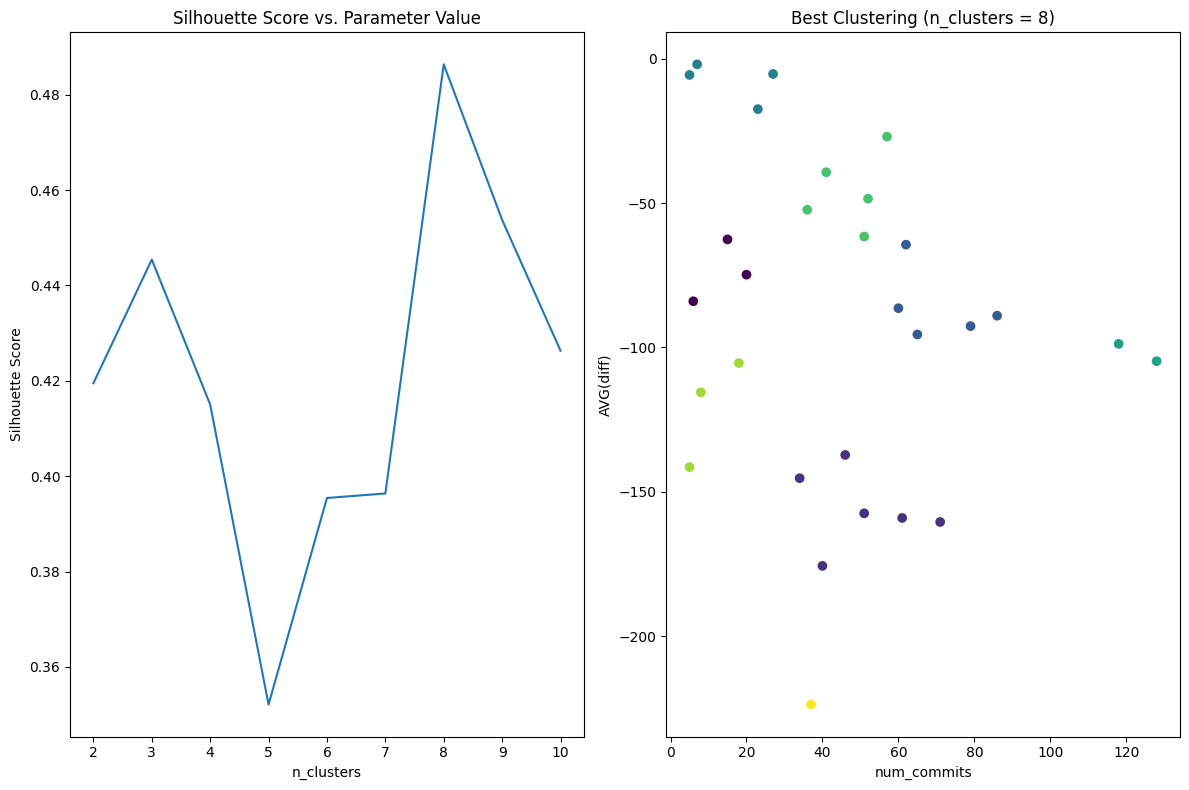

The best n_cluster value = 8


In [40]:
# model_class = AgglomerativeClustering
model_class = KMeans
model_params = {'random_state': 21}
# model_params = {}
param_name = 'n_clusters'
param_range = range(2, 11)
data = df[['num_commits', 'AVG(diff)']]

best_n_clusters, fig = optimize_clustering(model_class, model_params, param_name, param_range, data)
print(f"The best n_cluster value = {best_n_clusters}")